## Cointegration Testing using Engle-Granger

**Functions**

`tsa.adfuller`, `tsa.coint`

### Exercise 97
Download data on $CAY$ from [Martin Lettau’s site](https://sites.google.com/view/martinlettau/data).

In [1]:
import pandas as pd

cay = pd.read_csv("./data/cay.csv", parse_dates=True, index_col="date")
cay.head()

,c,w,y,cay=c-0.218 a-0.801y+0.441
date,,,,
1952-03-31,9.155654,10.964372,8.979659,0.015105
1952-06-30,9.171140,10.981857,8.982086,0.024837
1952-09-30,9.171598,10.978478,8.996057,0.014840
1952-12-31,9.201695,10.972688,9.026059,0.022166
1953-03-31,9.209631,10.973457,9.036562,0.021521


#### Explanation

We load the data which includes `c`, `w` (for wealth) and `y`.  The final column contains the
residual and the estimated coefficient.  These are estimated using a method called Dynamic OLS
and so will differ slightly from what we get below. 

In [2]:
import statsmodels.tsa.api as tsa

for col in ("c", "w", "y"):
    tvalue, pvalue, _, _, _, _ = tsa.adfuller(cay[col])
    print(f"T-stat: {tvalue}, P-value: {pvalue}")

T-stat: -1.0820069773562122, P-value: 0.7221937202119202
T-stat: -0.0337154235729797, P-value: 0.9556534320756881
T-stat: -1.9367330837291206, P-value: 0.3149828288287444


We start by verifying that all three series have unit roots using `adfuller`.

### Exercise 98
Is there evidence that these three series are cointegrated in the entire sample?

In [3]:
tvalue, pvalue, crit_val = tsa.coint(cay["c"], cay[["w", "y"]], trend="c")
print(f"T-stat: {tvalue}, P-value: {pvalue}")
print(crit_val)

T-stat: -2.2722379597328435, P-value: 0.6042692364482515
[-4.34765738 -3.772523   -3.47524693]


#### Explanation

We use `coint` to test for cointegration.  The LHS variable is `c` and the two RHS variables are `w` and `y`.  We specify the trend as `c` which included a constant, so that the model estimated is

$$ c_t = \beta_0 + \beta_1 w_t + \beta_2 y_t + \epsilon_t $$.

The $t$-stat is negative but not outside of the critical values, and the p-value is 60%.  We cannot
reject the null of **No Cointegration**. 

In [4]:
import statsmodels.api as sm

res = sm.OLS(cay["c"], sm.add_constant(cay[["w", "y"]])).fit()
_ = res.summary()

#### Explanation

We can estimate the model parameters using OLS. These are close to the values in the table above. Note that
the distribution of the coefficients is non-standard and so t-stats are not interpretable.

Text(0.5, 0, '')

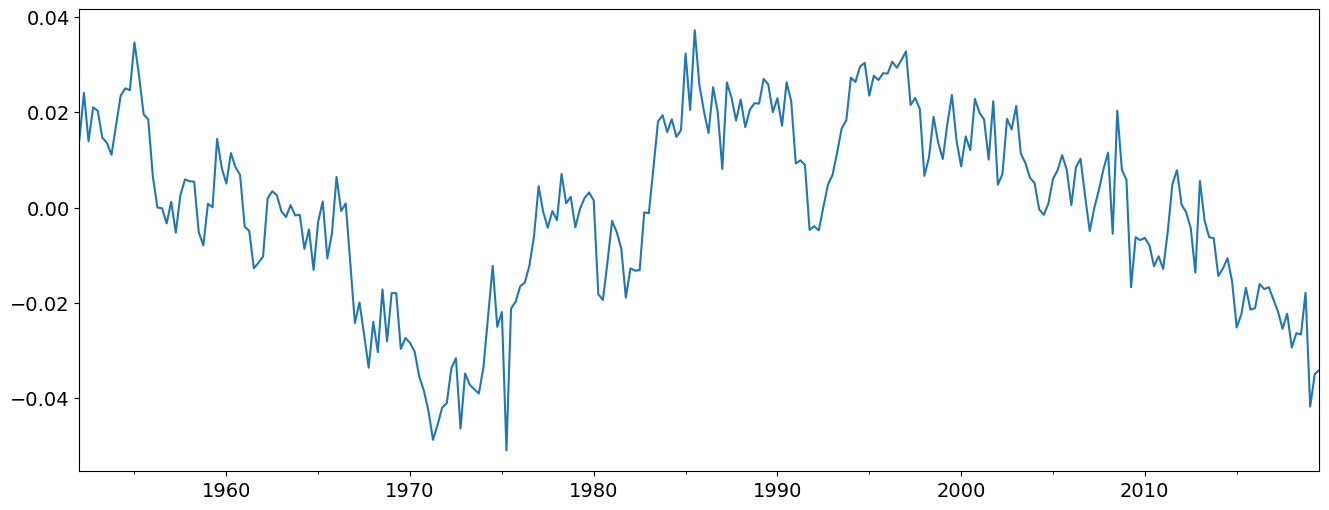

In [5]:
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=14)
ax = res.resid.plot()
ax.set_xlabel(None)

#### Explanation

Plotting the residual we see that it is highly persistent.  It seems to be consistent
with a unit root, which is why the test could not reject the null.

In [6]:
tvalue, pvalue, crit_val = tsa.coint(cay["w"], cay[["c", "y"]], trend="c")
print(f"T-stat: {tvalue}, P-value: {pvalue}")

T-stat: -1.5061840620024571, P-value: 0.894604248012647


In [7]:
tvalue, pvalue, crit_val = tsa.coint(cay["y"], cay[["c", "w"]], trend="c")
print(f"T-stat: {tvalue}, P-value: {pvalue}")

T-stat: -2.414606694016635, P-value: 0.5294350364538903


#### Explanation

In the EG procedure you can always re-order the variables and get different test statistics.  Here we see it makes no difference to the conclusion.

### Exercise 99
What about in the post-Volker era (start in 1981)?

#### Explanation 

Repeating in the post-Volker era we see that the conclusion is the same.

In [8]:
sub = cay["1981":]

tvalue, pvalue, crit_val = tsa.coint(sub["c"], sub[["w", "y"]], trend="c")
print(f"T-stat: {tvalue}, P-value: {pvalue}")

T-stat: -2.6111961819544733, P-value: 0.42493702431287733


In [9]:
res = sm.OLS(sub["c"], sm.add_constant(sub[["w", "y"]])).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      c   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.995e+04
Date:                Wed, 27 Aug 2025   Prob (F-statistic):          1.06e-184
Time:                        15:13:37   Log-Likelihood:                 445.26
No. Observations:                 155   AIC:                            -884.5
Df Residuals:                     152   BIC:                            -875.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0146      0.087     -0.168      0.867      -0.186       0.157
w              0.1841      0.021      8.844      0.000       0.143       0.225
y              0.7999      0.032     24.829      0.000       0.736       0.863
==============================================================================
Omnibus:                       12.559   Durbin-Watson:                   0.282
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.643
Skew:                          -0.725   Prob(JB):                      0.00109
Kurtosis:                       3.106   Cond. No.                     1.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

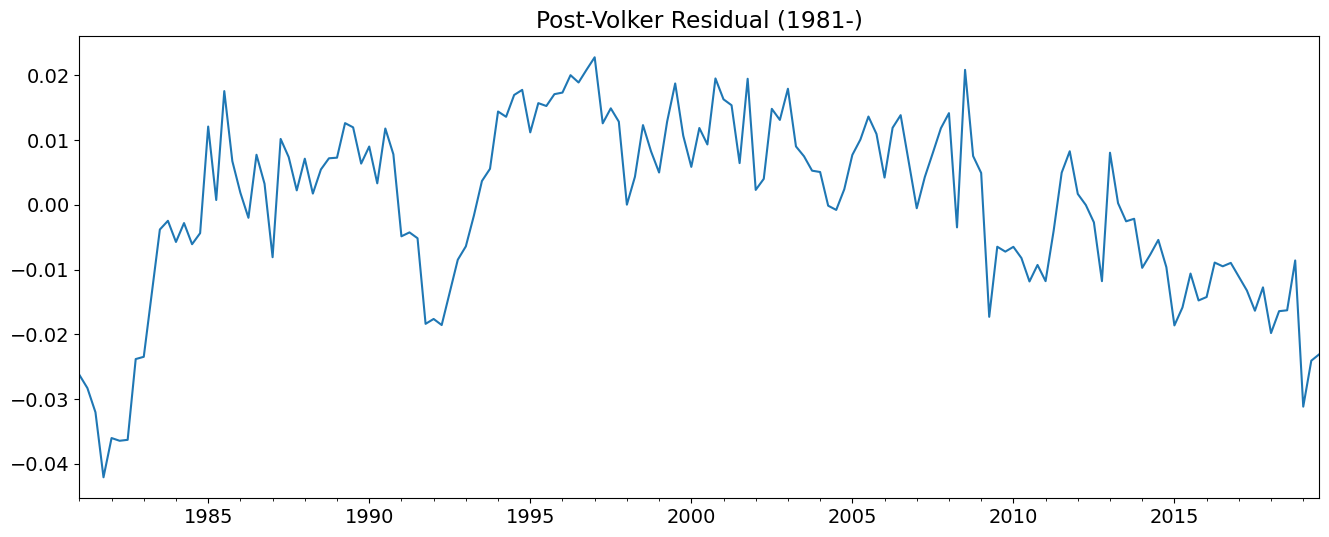

In [10]:
plt.rc("figure", figsize=(16, 6))
ax = res.resid.plot()
ax.set_title("Post-Volker Residual (1981-)")
ax.set_xlim(res.resid.index.min(), res.resid.index.max())
_ = ax.set_xlabel(None)

#### Explanation

The residuals are incredibly persistent and only cross 0 a few times in the 30 years of the sample. 

### Exercise 100

Download monthly WTI and Brent crude prices from the [EIA](https://www.eia.gov/) and import them.
Examine whether the log prices are cointegrated.

In [11]:
import numpy as np

brent = pd.read_excel("././data/RBRTEm.xls", sheet_name="Data 1", skiprows=2)
wti = pd.read_excel("././././data/RWTCm.xls", sheet_name="Data 1", skiprows=2)
brent = brent.set_index("Date")
brent.columns = ["brent"]
wti = wti.set_index("Date")
wti.columns = ["wti"]
oil = np.log(pd.concat([brent, wti], axis=1).dropna())

#### Explanation

We start by loading the data, combining it into a single frame, dropping missing observations and taking the log of of the data. 

In [12]:
tvalue, pvalue, crit_val = tsa.coint(oil["brent"], oil[["wti"]], trend="c")
print(f"T-stat: {tvalue}, P-value: {pvalue}")

T-stat: -5.518725332284866, P-value: 1.6430895196038114e-05


#### Explanation

When tested using EG, we see that the t-stat is very negative and the p-value is very small.  This indicates that the null of no cointegration is rejected in favor of cointegration.

In [13]:
res = sm.OLS(oil["brent"], sm.add_constant(oil[["wti"]])).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  brent   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 5.973e+04
Date:                Wed, 27 Aug 2025   Prob (F-statistic):               0.00
Time:                        15:13:37   Log-Likelihood:                 568.12
No. Observations:                 393   AIC:                            -1132.
Df Residuals:                     391   BIC:                            -1124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3587      0.016    -21.830      0.000      -0.391      -0.326
wti            1.0951      0.004    244.387      0.000       1.086       1.104
==============================================================================
Omnibus:                       18.171   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.753
Skew:                           0.457   Prob(JB):                     3.12e-05
Kurtosis:                       3.656   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Explanation

The coefficient on WTI is close to 1 (although probably different), which indicates that these are substitutes.

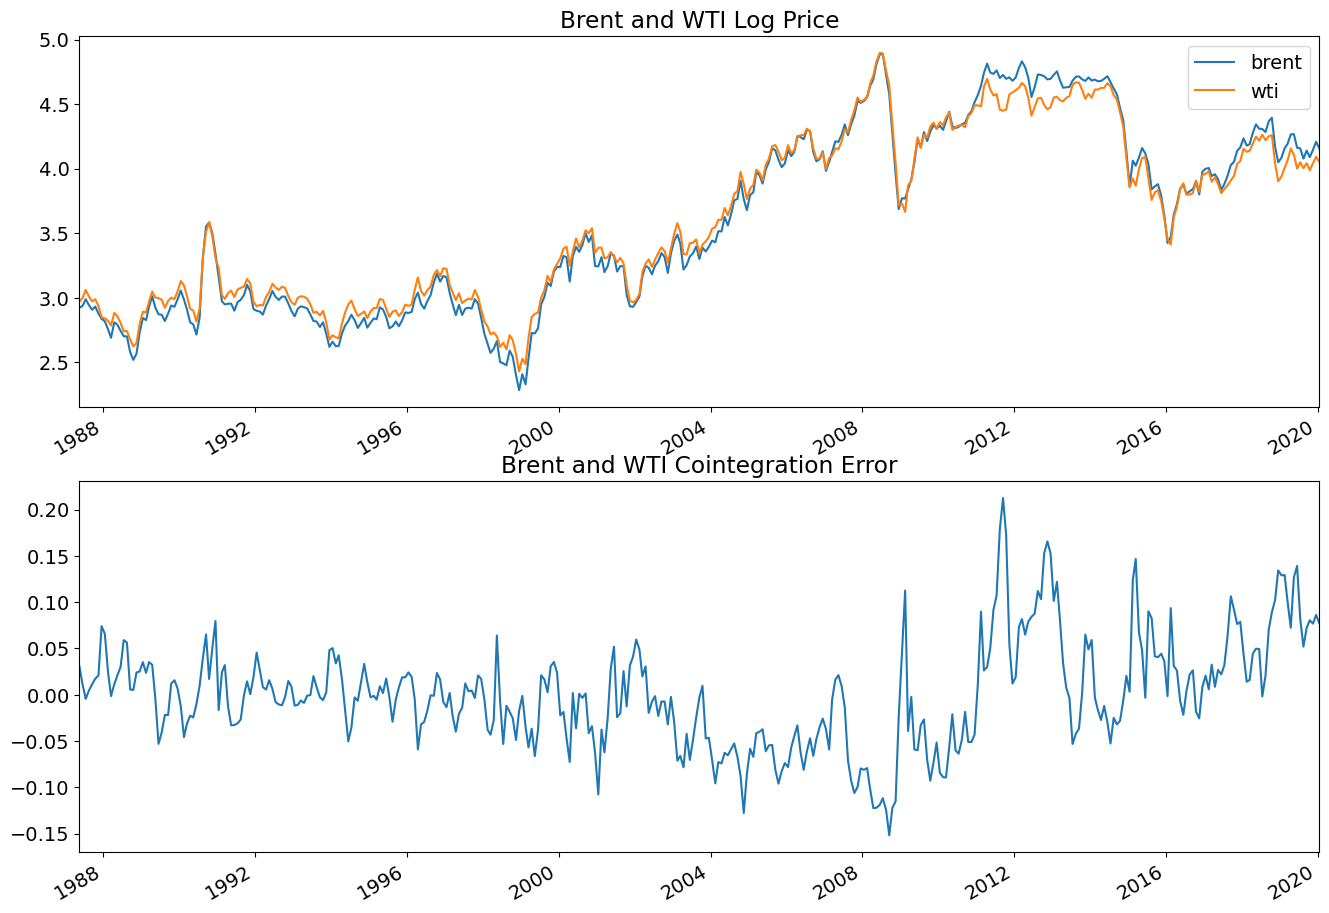

In [14]:
plt.rc("figure", figsize=(16, 12))
fig, axes = plt.subplots(2, 1)
ax = oil.plot(ax=axes[0])
ax.set_xlabel(None)
ax.set_title("Brent and WTI Log Price")
xl = ax.set_xlim(oil.index.min(), oil.index.max())
ax = res.resid.plot(ax=axes[1])
ax.set_title("Brent and WTI Cointegration Error")
ax.set_xlim(xl)
_ = ax.set_xlabel(None)

#### Explanation

We plot the two log prices in the top panel and the residua in the bottom.  The series move closely together and the residual looks like noise.  It is worth noting that there appears to be a persistent gap starting in 2011 where Brent is a bit higher than WTI.  This might indicate that there have been some structural changes in the market. 